# Vorgehen
In diesem Dokument wird der Pre-Processing Prozess aufgezeigt. Die Daten aus dem erhaltenen Extract werden in folgender Reihenfolge abgearbeitet:
1. Stop word removal
1. Stemming
1. Tokenization
1. Vokabular
    * Lexikalischer Reichtum
    * Häufigkeitsverteilung
    * Hapaxen

In [1]:
import pandas as pd

extract = '../01_data/chatbot_extract-1.csv'
names=['ticket', 'customer', 'inquiry', 'state', 'answer']

corpus = pd.read_csv(extract, encoding='utf-8', names=names, skiprows=[0], usecols=[1, 2, 4, 5, 6])
corpus['inquiry'] = corpus['inquiry'].str.lower()
corpus.drop_duplicates(subset='inquiry', keep='first', inplace=True)
corpus.dropna(axis='rows', how='any', inplace=True)

corpus.describe()

,ticket,customer,inquiry,state,answer
count,70,70,70,70,70
unique,6,16,70,6,6
top,Fehler in der App,SVBA,ich kann in der klasse f(18)-kss den bildschir...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
freq,18,17,1,45,27


### 1. Stop word removal
Als erster Schritt werden alle unbedeutenden Wörter wie z.B _und_, _ein_, _als_ etc. von den _inquiries_ entfernt.

In [2]:
import re
from nltk.corpus import stopwords

stop_words = stopwords.words('german')
stop_words.extend([''])

def without_stop_words(text):
    text = re.sub(r'[^\u00C0-\u017Fa-zA-Z\s]', '', text, re.I | re.A)
    return str.join(' ', [t for t in text.split(' ') if not t in stop_words])

In [3]:
for i, inquiry in enumerate(corpus['inquiry']):
    corpus['inquiry'][i] = without_stop_words(inquiry)

In [4]:
corpus.head()

,ticket,customer,inquiry,state,answer
0,Fehler in der App,Swissmem,normenauszug rechenbuch metall tabellenbuchs m...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
1,Fehler in der App,SVBA,bilder mehr öffnen editorprogramm bearbeiten,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
2,Fehler in der App,hep,leider fehlen paar kapitel lehrmittel lma d ei...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
3,Anmeldung / Aktivierung,AGVS,fk zb seite lesen steht seiten auszugs genutzt,closed successful,Linux
4,Anmeldung / Aktivierung,SVBA,kapitel technisches englisch herunterladen ste...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"


**Gute Sätze**

Wie sehen ein paar gute Sätze nach der stop word Entfernung aus?

In [5]:
word = 5
mask = (corpus['inquiry'].str.len() > 50 * word)
good_inquiries = corpus.loc[mask].inquiry

for i, msg in enumerate(good_inquiries[:5]):
    print('Bsp.', i, '\t', msg, '\n')

Bsp. 0 	 normenauszug rechenbuch metall tabellenbuchs metall fechkundebuch metall machineworld topdesign automation control konstrukteur konstrukteur konstrukteur funktionieren mehr kommt meldung mehr seiten kostenlos verfügbar bücher bezahlt kurzem funktioniert 

Bsp. 1 	 heute beook laptop aktuallisieren trotz löschen alten programms erneutem download neuste version laptop laden pc schulung lernenden funktioniert einwandfreials fehlermeldung gerätezahl überschritten angegeben beook schulungspc laptop installiert zwei geräteden laptop benötige weiterbildung märz bernwo liegt fehler 

Bsp. 2 	 beook lehrmittel ehr besichtigen mitschühlern funktiorniert ausser dario nichtso mehr informieren vollständig klasse mitarbeiten aktivierungscood enthalten tun vorhin direkt angerufen gbitet erneut subbrotanfrage machenliebe grüsse boschung nicole mitschülerin schreibt besprochen subbrot anfrage geht 

Bsp. 3 	 im lehrmittel "deutsch im abu", 3. auflage gibt es bei der übung "beschreibung/wortart

### 2. Stemming
Als zweiten Schritt werden alle Wörter auf eine Wurzel Form gekürzt. Im gegensatz zu Lemming ist das Resultat von Stemming nicht grammatikalisch korrekt.

In [6]:
from nltk.stem.snowball import SnowballStemmer

snowball = SnowballStemmer('german', ignore_stopwords=True)

def stem(text):
    return str.join(' ', [snowball.stem(t) for t in text.split(' ')])

In [7]:
for i, inquiry in enumerate(corpus['inquiry']):
    corpus['inquiry'][i] = stem(inquiry)

In [8]:
corpus.head()

,ticket,customer,inquiry,state,answer
0,Fehler in der App,Swissmem,normenauszug rechenbuch metall tabellenbuchs m...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
1,Fehler in der App,SVBA,bilder mehr öffnen editorprogramm bearbeiten,closed successful,"Coupon einlösen, Produkte nicht vorhanden"
2,Fehler in der App,hep,leider fehlen paar kapitel lehrmittel lma d ei...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner"
3,Anmeldung / Aktivierung,AGVS,fk zb seite lesen steht seiten auszugs genutzt,closed successful,Linux
4,Anmeldung / Aktivierung,SVBA,kapitel technisches englisch herunterladen ste...,closed successful,"Coupon einlösen, Produkte nicht vorhanden"


**Gute Sätze**

Wie sehen ein paar gute Sätze nach der stop word Entfernung aus?

In [9]:
word = 5
mask = (corpus['inquiry'].str.len() > 50 * word)
good_inquiries = corpus.loc[mask].inquiry

for i, msg in enumerate(good_inquiries[:5]):
    print('Bsp.', i, '\t', msg, '\n')

Bsp. 0 	 heute beook laptop aktuallisieren trotz löschen alten programms erneutem download neuste version laptop laden pc schulung lernenden funktioniert einwandfreials fehlermeldung gerätezahl überschritten angegeben beook schulungspc laptop installiert zwei geräteden laptop benötige weiterbildung märz bernwo liegt fehler 

Bsp. 1 	 beook lehrmittel ehr besichtigen mitschühlern funktiorniert ausser dario nichtso mehr informieren vollständig klasse mitarbeiten aktivierungscood enthalten tun vorhin direkt angerufen gbitet erneut subbrotanfrage machenliebe grüsse boschung nicole mitschülerin schreibt besprochen subbrot anfrage geht 

Bsp. 2 	 die grösse der buchstaben lässt sich nicht verkleinern. die schrift  gross auf einer sehr niedrigen stuffe. 



### 3. Tokenization
In einem ersten Schritt werden alle _inquiries_ gesammelt und in einzelne Wörter zerlegt.

In [10]:
from nltk.tokenize import word_tokenize

corpus['inquiry_tokens'] = corpus['inquiry'].apply(word_tokenize)
corpus.head()

,ticket,customer,inquiry,state,answer,inquiry_tokens
0,Fehler in der App,Swissmem,normenauszug rechenbuch metall tabellenbuchs m...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner","[normenauszug, rechenbuch, metall, tabellenbuc..."
1,Fehler in der App,SVBA,bilder mehr öffnen editorprogramm bearbeiten,closed successful,"Coupon einlösen, Produkte nicht vorhanden","[bild, mehr, offn, editorprogramm, bearbeit]"
2,Fehler in der App,hep,leider fehlen paar kapitel lehrmittel lma d ei...,closed successful,"Mac: Access Denied -> Cookies, Virenscanner","[leid, fehl, paar, kapitel, lehrmittel, lma, d..."
3,Anmeldung / Aktivierung,AGVS,fk zb seite lesen steht seiten auszugs genutzt,closed successful,Linux,"[fk, zb, seit, les, steht, seit, auszug, genutzt]"
4,Anmeldung / Aktivierung,SVBA,kapitel technisches englisch herunterladen ste...,closed successful,"Coupon einlösen, Produkte nicht vorhanden","[kapitel, technisch, englisch, herunterlad, st..."


Jetzt können wir aus den Tokens ein Vocabular erstellen um zu sehen wieviele Wörter vorhanden sind.

### 4. Vokabular
Das Vocabular umfasst **546** Wörter.

In [11]:
inquiry_tokens = [item for sublist in corpus['inquiry_tokens'] for item in sublist]

vocab = list(set(inquiry_tokens))
vocab.sort()

print(f'Wörter: {len(inquiry_tokens)}')
print(f'Vokabular: {len(vocab)}')
vocab[20:30]

Wörter: 970
Vokabular: 546


['aktualisi',
 'aktuallisi',
 'alle',
 'allgemeinbild',
 'als',
 'alt',
 'and',
 'anekgreuzt',
 'anfrag',
 'angegeb']

#### Lexikalischer Reichtum

In [12]:
print(f'Lexikalischer Reichtum: {len(vocab) / len(inquiry_tokens)}')

Lexikalischer Reichtum: 0.5628865979381443


#### Häufigkeitsverteilung von Wörtern

In [13]:
from nltk import FreqDist

fdist1 = FreqDist(inquiry_tokens)
fdist1

FreqDist({'neu': 18, 'mehr': 12, '.': 12, 'laptop': 10, 'funktioniert': 9, 'gerat': 9, 'samsung': 9, 'beook': 9, 'buch': 8, 'app': 8, ...})

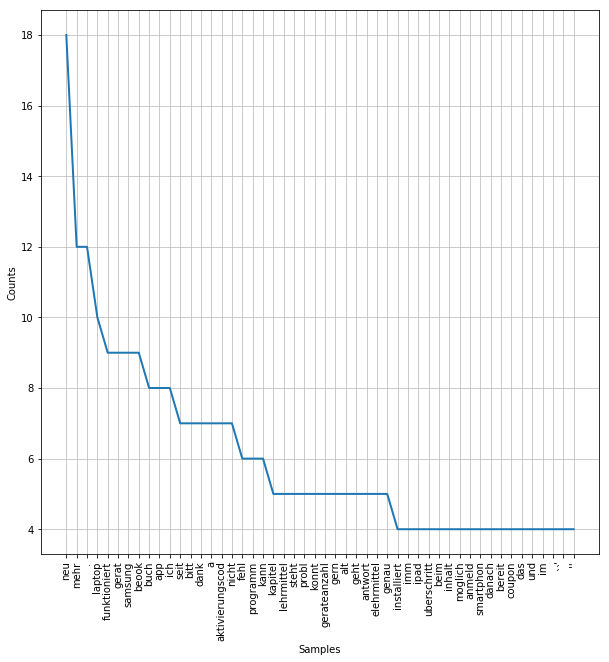

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

fdist1.plot(50, cumulative=False)

#### Hapaxen
Hapaxe sind Wörter die nur einmal vorkommen.

In [16]:
print(f'Anzahl Haxapen: {len(fdist1.hapaxes())}')
fdist1.hapaxes()[:5]

Anzahl Haxapen: 357


['normenauszug', 'rechenbuch', 'tabellenbuch', 'fechkundebuch', 'machineworld']

In [17]:
for i in corpus[corpus['inquiry'].str.contains('rechenbuch')].inquiry:
    print(i, '\n')

normenauszug rechenbuch metall tabellenbuchs metall fechkundebuch metall machineworld topdesign automation control konstrukteur konstrukteur konstrukteur funktionieren mehr kommt meldung mehr seiten kostenlos verfügbar bücher bezahlt kurzem funktioniert 

beook funktionieren inhalte fr fachrechenbuches mehr erscheint meldung geräteanzahl überschritten wissen lizenz jedoch lap top nirgends installiertkönnen frbuch freischalten 

